# NLP and the Web

## Task 0 ~ 0P

##### a) Please enter your group number

14

_**Regarding types, documentation, and output:**_

_We tried to make the description of the parameters as clear as possible. However, if you believe that something is missing, please reach out to us in Moodle. We provide type hints for the function parameters and return values of the functions that you have to implement._

_Nevertheless, your code must use the provided method stubs and parameters. Furthermore, make sure that your code runs without errors and in a reasonable amount of time, for example by using "Kernel/Restart & Run All" before submitting._

_Please use comments where appropriate to help the tutors understand your code. This is especially important for the more extensive exercises later on. Finally, please pay attention to how you output the results. We highly recommend using `display(df)` for displaying data frames._

_**Please only modify the template in the specified markdown and code cells (e.g. YOUR CODE / ANSWER / IMPORTS HERE). If you add any extra cells, they wont be taken into account while grading!  Some cells are left blank on purpose. Please do not modify these cells, because they are used to autograde your submission. If these cells are modified, the automatic grading for your submission will fail and we might deduct points. Please do not modify the cells containing public and private tests. If you want to do your own tests, please use the code cell containing your code solution (YOUR CODE HERE).**_

---

# NLP and the Web: Home Exercise 6

In this exercise, you will deepen the theoretical concept of QA from the lectures and learn how to analyze QA systems and how explainability in AI systems can be achieved. This will be based on the UKP-SQuARE platform which was presented during the lecture. Within this exercise, you will participate in the research community and increase the diversity of models on the UKP-SQuARE platform.

For this task you should use [Google Colab](https://colab.research.google.com/) where you have free access to GPUs for fine-tuning your transformer model.


## Task 1: Fine-tune Transformer - 5 Points

In this task, you will fine-tune a pre-trained transformer-based architecture on a QA dataset with PyTorch and the [Hugging Face](https://huggingface.co/) library. You will contribute to the community by deploying your model on Hugging Face’s Model Hub and the SQuARE platform.

**a) Finetune the assigned model with the respectively assigned dataset. Before you can do this you need to prepare your dataset. Therefore you have to download the data from Hugging Face and pass it through the training example script from Hugging Face: https://github.com/huggingface/transformers/blob/main/examples/pytorch/question-answering/run_qa.py** **(3p)**

In [1]:
# Download all necessary dependencies. You should not modify and only run this cell
!git clone https://github.com/huggingface/transformers
%cd ./transformers
!pip install .
!pip install huggingface_hub
%cd ./examples/pytorch/question-answering
!pip install -r requirements.txt
%cd ../../../../
!pip install huggingface-hub

fatal: destination path 'transformers' already exists and is not an empty directory.
/home/jan/Projects/NLP4Web/Homework 6/transformers


/home/jan/Projects/NLP4Web/nlp4web/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Processing /home/jan/Projects/NLP4Web/Homework 6/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.38.0.dev0-py3-none-any.whl size=8457274 sha256=5f68d45daf0d48dc713b004acd0ff24480460eb910ef2f39dee71d1d04399355
  Stored in directory: /tmp/pip-ephem-wheel-cache-ovpkr7n6/wheels/f9/f4/a9/841ea77673ec9d3647def9a20aeac68c738993fac93722d87d
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.0.dev0
    Uninstalling transformers-4.38.0.dev0:
      Successfully uninstalled transformers-4.38.0.dev0
/home/jan/Projects/NLP4Web/Homework 6/transformers/examples/pytorch/question-answering
/home/jan/Projects/NLP4Web/Homework 6


In [2]:
!pip install datasets==2.16.1
!pip install tokenizers==0.15.0

In [2]:
#Please only run the cell to get all imports
import json
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, AutoModel
from typing import List, Dict,  Any
import os
import re
import itertools
import gzip
from datasets import load_dataset
from datasets.arrow_dataset import Dataset

/home/jan/Projects/NLP4Web/nlp4web/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The following code provides assigns your group a model and data set, that you should use to solve this homework. You have only to insert your group number.

In [4]:
def get_model_dataset_combination(group: int) -> tuple:
    models = ['microsoft/xtremedistil-l6-h256-uncased', 'microsoft/xtremedistil-l12-h384-uncased', 'microsoft/xtremedistil-l6-h384-uncased', 'distilbert-base-uncased','microsoft/MiniLM-L12-H384-uncased', 'huawei-noah/TinyBERT_General_4L_312D', 'huawei-noah/TinyBERT_General_6L_768D']
    datasets = ['squad_v2']
    result = list(itertools.product(models, datasets))
    result = 16*result
    # for idx, r in enumerate(result):
    #     print(f"Index: {idx}, Content: {r}")
    return result[group]

*In* the next subtask you should download the data set `squad_v2`.

You can find more information on the Hugging Face [page](https://huggingface.co/datasets/squad_v2).

In [5]:
# Insert your group number here and print your assigned model data set combination
group_number = 14 # insert your group number
model_name, dataset_name = get_model_dataset_combination(group_number)
print(f"Model: {model_name}, Dataset: {dataset_name}")
# Insert the link from the linked GitHub similar to the provided example to retrieve the data
dataset = load_dataset('squad_v2')
data_train = dataset['train']
data_dev = dataset['validation']




Model: microsoft/xtremedistil-l6-h256-uncased, Dataset: squad_v2


In [6]:
# This is how your dataset should look like:
expected = [{
    "answers": {
        "answer_start": [1],
        "text": ["This is a test text"]
    },
    "context": "This is a test context.",
    "id": "1",
    "question": "Is this a test?",
},...]

In [7]:
# Tests - Don't modify
assert data_train.split == "train"
assert data_dev.split == "validation"

In [8]:
# Tests - Don't modify
import random
idx = random.randint(0, 10)
print(idx)
print(data_train[idx])
print(data_dev[idx])
assert isinstance(data_train[idx]['context'], str)
assert isinstance(data_train[idx]['id'], str)
assert isinstance(data_train[idx]['question'], str)
assert isinstance(data_dev[idx]['answers']['text'], list)
assert isinstance(data_dev[idx]['answers']['answer_start'], list)

7
{'id': '56bf6b0f3aeaaa14008c9605', 'title': 'Beyoncé', 'context': 'Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ bee-YON-say) (born September 4, 1981) is an American singer, songwriter, record producer and actress. Born and raised in Houston, Texas, she performed in various singing and dancing competitions as a child, and rose to fame in the late 1990s as lead singer of R&B girl-group Destiny\'s Child. Managed by her father, Mathew Knowles, the group became one of the world\'s best-selling girl groups of all time. Their hiatus saw the release of Beyoncé\'s debut album, Dangerously in Love (2003), which established her as a solo artist worldwide, earned five Grammy Awards and featured the Billboard Hot 100 number-one singles "Crazy in Love" and "Baby Boy".', 'question': "Who managed the Destiny's Child group?", 'answers': {'text': ['Mathew Knowles'], 'answer_start': [360]}}
{'id': '5ad39d53604f3c001a3fe8d3', 'title': 'Normans', 'context': 'The Normans (Norman: Nourmands; French: Norman

Save the data into a JSON file and remove the questions where no answer is given.

*Hint:* You might want to have a look at the `json.dumps` function.

In [9]:
def save_json(dataset: List[Dict[str, Any]], path: str) -> None:
    """
    Saves the right input format for the transformer model as json file.
    
    The data should be saved as a JSON. In the format of:
        {
        'data': [
            {
                "answers": {
                    "answer_start": [1],
                    "text": ["This is a test text"]
                },
                "context": "This is a test context.",
                "id": "1",
                "question": "Is this a test?",
            },
            {...},
            ...
        ]
        }
    :param dataset (List[Dict[str, Any]]): The list of input data to be saved to the file.
    :param path (str): The path of the json file to save the data to.
    :return: None
    """
    dataset_list = [entry for entry in dataset if entry.get('answers') and entry['answers'].get('text')]
    with open(path, 'w', encoding='utf-8') as file:
        # Use json.dump to write the data to a file, ensuring it's readable
        json.dump({'data': dataset_list}, file, indent=2)

save_json(data_train, 'train_file.json')
save_json(data_dev, 'dev_file.json')

In [10]:
#Tests - Don't modify
assert [f for f in os.listdir() if re.match('train_file.json', f)]
assert [f for f in os.listdir() if re.match('dev_file.json', f)]

b) For training your model you need to adapt the following script and execute it. This should take less than 1 hour on Google Colab with a GPU.

Hint: You are working directories of Google Colab, make sure you always use the right paths and a GPU for training. **(1p)**

In [11]:
# Define your script variables here
MODEL_NAME = "microsoft/xtremedistil-l6-h256-uncased" # The one you where assigned from the function `get_model_dataset_combination`
TRAIN_FILE_NAME = 'train_file.json' # The file name of the train file
EVAL_FILE_NAME ='dev_file.json' # The file name of the eval file
# # YOUR CODE HERE
# raise NotImplementedError()

In [12]:
# Tests - Don't modify
assert re.search('train_file.json', TRAIN_FILE_NAME)
assert re.search('dev_file.json', EVAL_FILE_NAME)

In [13]:
# Task: run the script
!python transformers/examples/pytorch/question-answering/run_qa.py \
  --model_name_or_path $MODEL_NAME \
  --train_file $TRAIN_FILE_NAME \
  --validation_file $EVAL_FILE_NAME \
  --do_train \
  --do_eval \
  --per_device_train_batch_size 12 \
  --learning_rate 3e-5 \
  --num_train_epochs 2 \
  --max_seq_length 384 \
  --doc_stride 128 \
  --output_dir ./tmp/result/

02/07/2024 16:51:20 - WARNING - __main__ - Process rank: 0, device: cuda:0, n_gpu: 1, distributed training: False, 16-bits training: False
02/07/2024 16:51:20 - INFO - __main__ - Training/evaluation parameters TrainingArguments(
_n_gpu=1,
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=True,
eval_accumulation_steps=None,
eval_delay=0,
eval_steps=None,
evaluation_strategy=IntervalStrategy.NO,
fp16=False,
fp16_backend=auto,
fp16_full_eval=False,
fp16_opt_level=O1,
fsdp=[],
fsdp_config={'min_num_params': 0, 'xla':

**c) To make the model available for other researchers you need to deploy it to the [Hugging Face Model Hub](https://huggingface.co/models). Don't forget to upload your tokenizer alongside the model. Insert the link of your deployed model as an answer for this task.**  **(1p)**

Hint: You will need to create an account on Hugging Face and create a [repository](https://huggingface.co/new). 

**IMPORTANT:** Make the repository **public**!!! Save your model name in the variable `your_model_name`. You'll find the model name on top of your model repository on Hugging Face.

In [5]:
# insert the name of your shared model
your_model_name = 'jahknem/xtremedistil-l6-h256-uncased' # The name from Hugging Face: `UserName/RepoName`
checkpoint = 'tmp/result/checkpoint-14500'  # Example checkpoint
model = AutoModel.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

model.push_to_hub(your_model_name)
tokenizer.push_to_hub(your_model_name)

link = f'https://huggingface.co/{your_model_name}'

Some weights of BertModel were not initialized from the model checkpoint at tmp/result/checkpoint-14500 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors: 100%|██████████| 51.0M/51.0M [00:36<00:00, 1.41MB/s]


In [6]:
#Tests - Don't modify
assert re.search("huggingface.co", link)


## Task 2: Analyze the model - 5 Points

In this task, you will analyze models with regard to different questions. You should state your findings clearly and traceable including examples. You are allowed to include screenshots in your answers to make your answers understandable. This task is independent of task 1. Please select one of the follwing models: `DROP BERT Adapter`, `Xtremedistil-L6-H256-Uncased-NaturalQuestionsShort`, `SQuAD 2.0 BERT Adapter`. They should be available on the SQuARE website in the [*QA Hub*](https://square.ukp-lab.de/qa_hub).

Hint: In general it's not expected that you write full essays to answer the questions. Short and clear answers are preferred and sufficient to achieve full points.

**a) Which type of questions is your selected model able to answer? How is this type different from at least one other type of questions you know from the lecture?
Please state which model you choose.** **(1p)**

We choose the DROP BERT Adapter Model.

The model is able to extract the answers tob factoid questions very well, while bening unable to answer non-factoid questions. While factoid questions ask for specifics like numbers, words or persons, non-factoid questions are answered with reasons or arguments. It answers factoid questions well, but with low confidence.


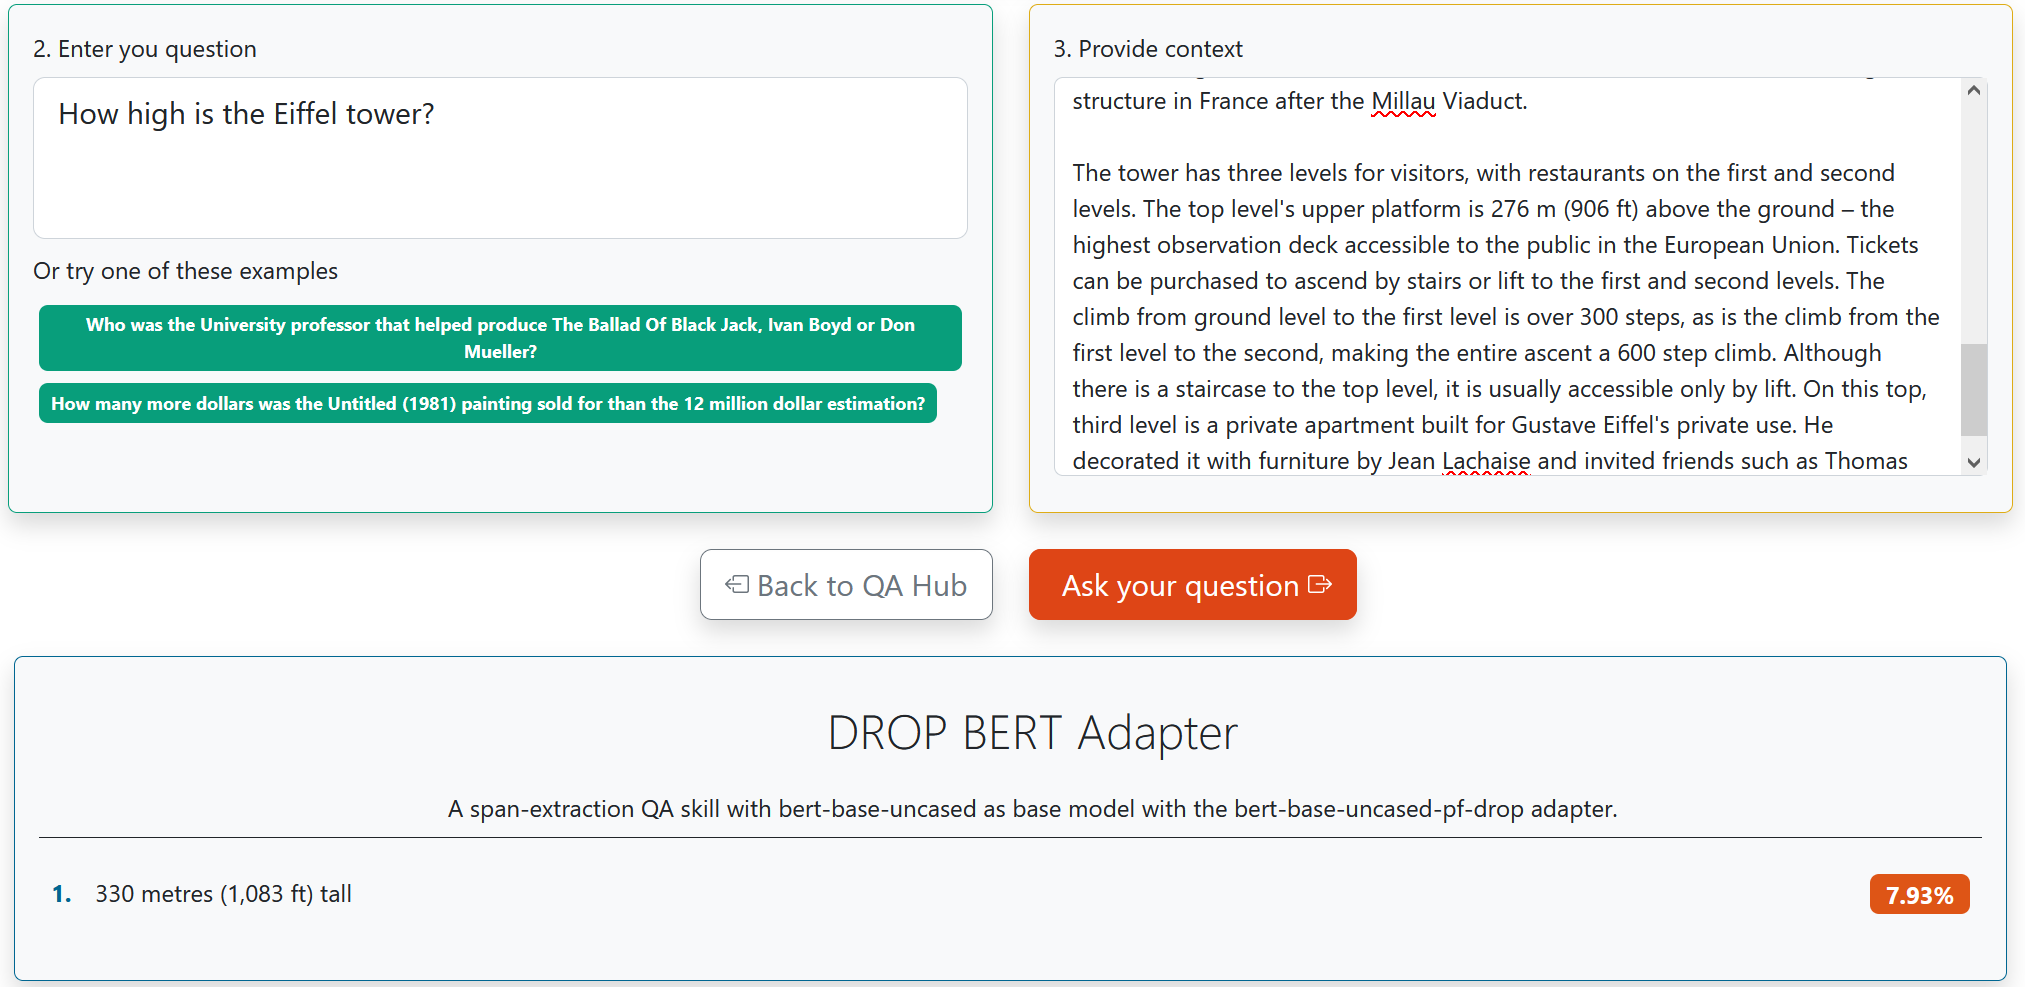
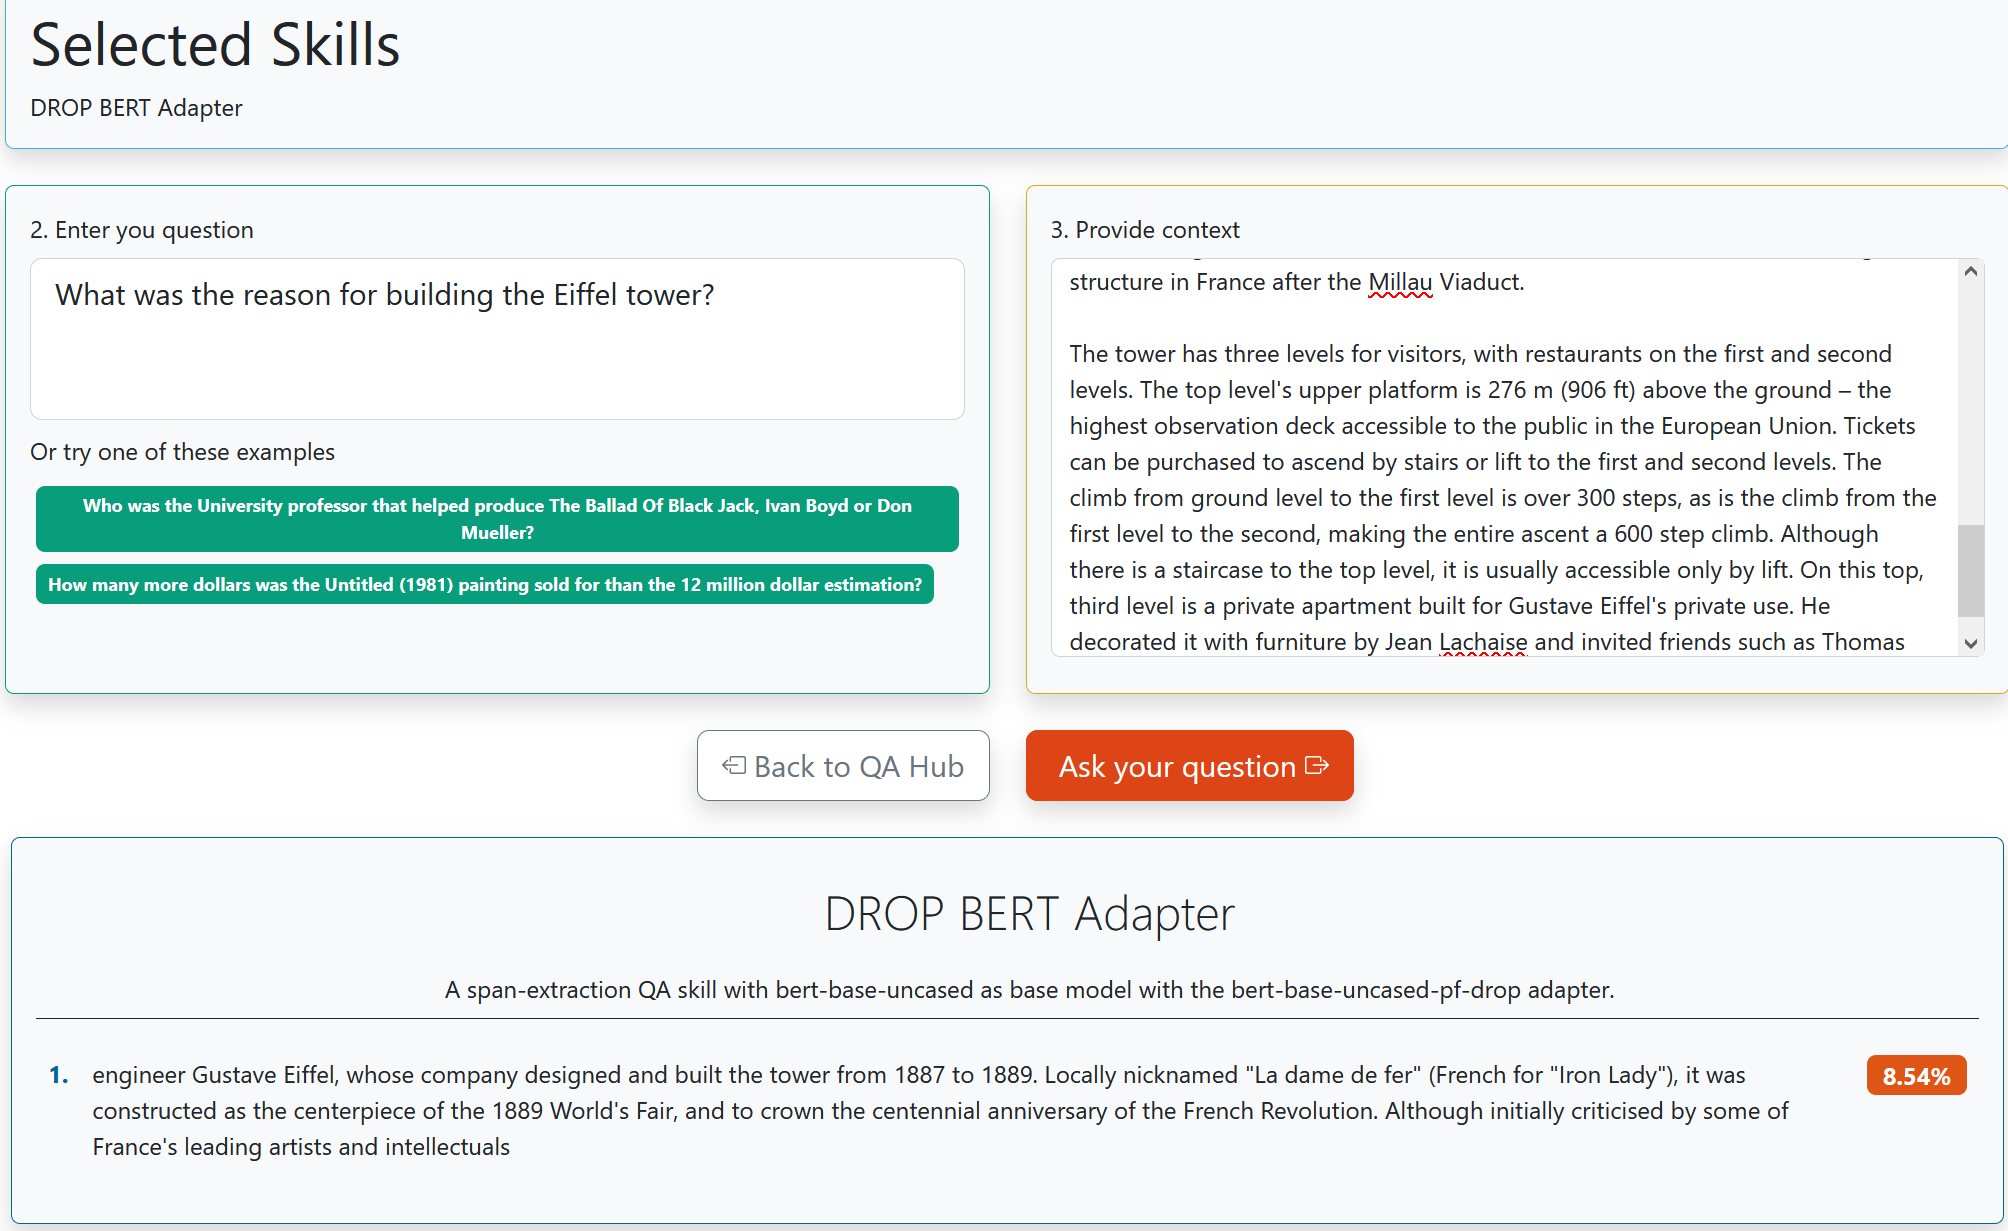

**b) Analyze the general behavior of the model. Therefore run the model with different questions. Which type of questions is the model able to answer, and which are not? Interpret your results and provide examples for both.** **(2p)**

Hint: It may help to compare the selected model to other models on the UKP-SQuARE platform.

The model is able to answer easier factoid questions where the answer is clearly stated in the text that was given as context. Questions like "How high is the Eiffel tower?" or "When was Angela Merkel born?" are answered correctly nad reliably, even when the context includes a lot of other dates and numbers.
When asked harder questions where for example the answer would be a span of time, I need to ask in a way that stated that clearly. The model is unable to answer "How long was Angela Merkel the chancellor of germany?"
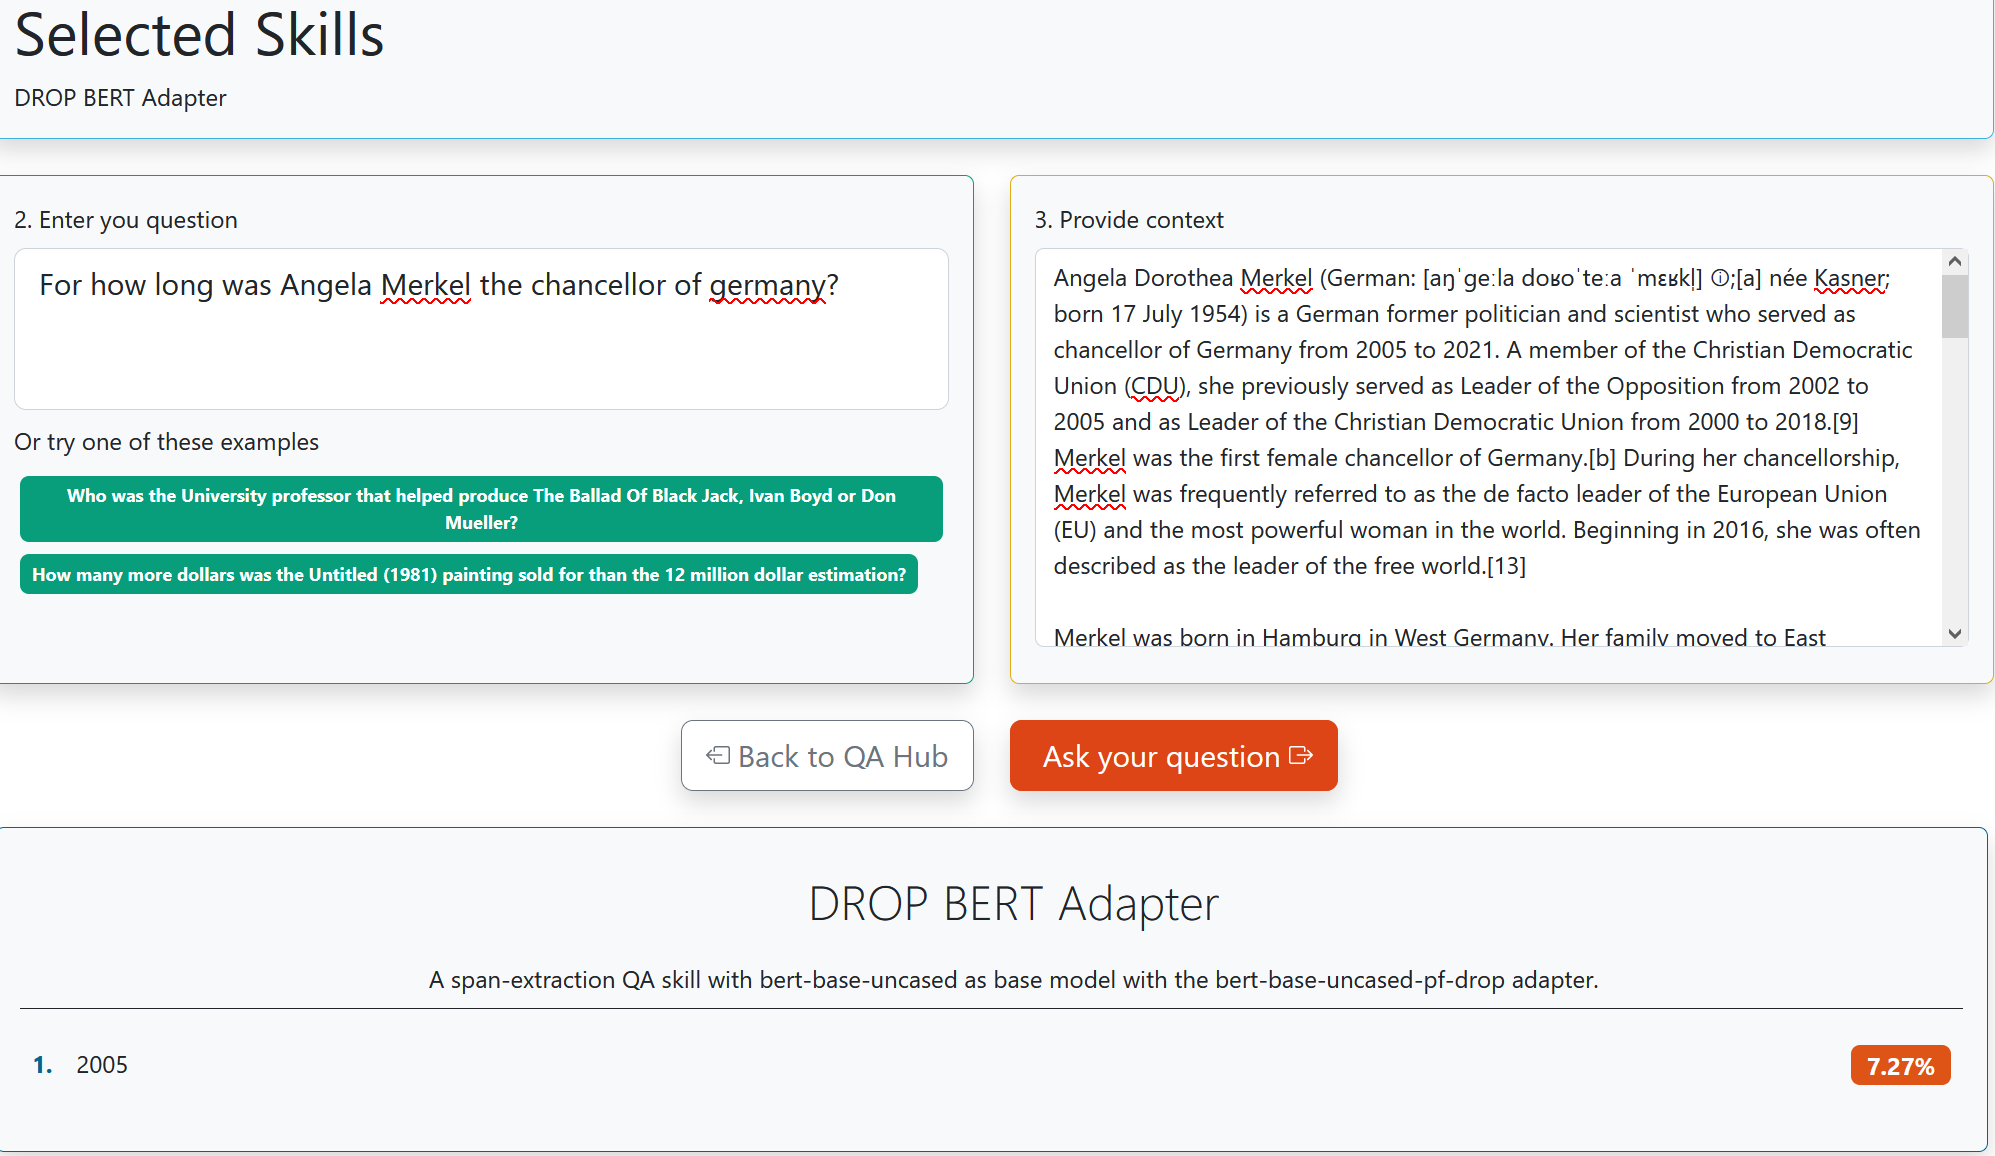
while it is able to answer the same question when I state that I ask for a span of time betweeen two dates.
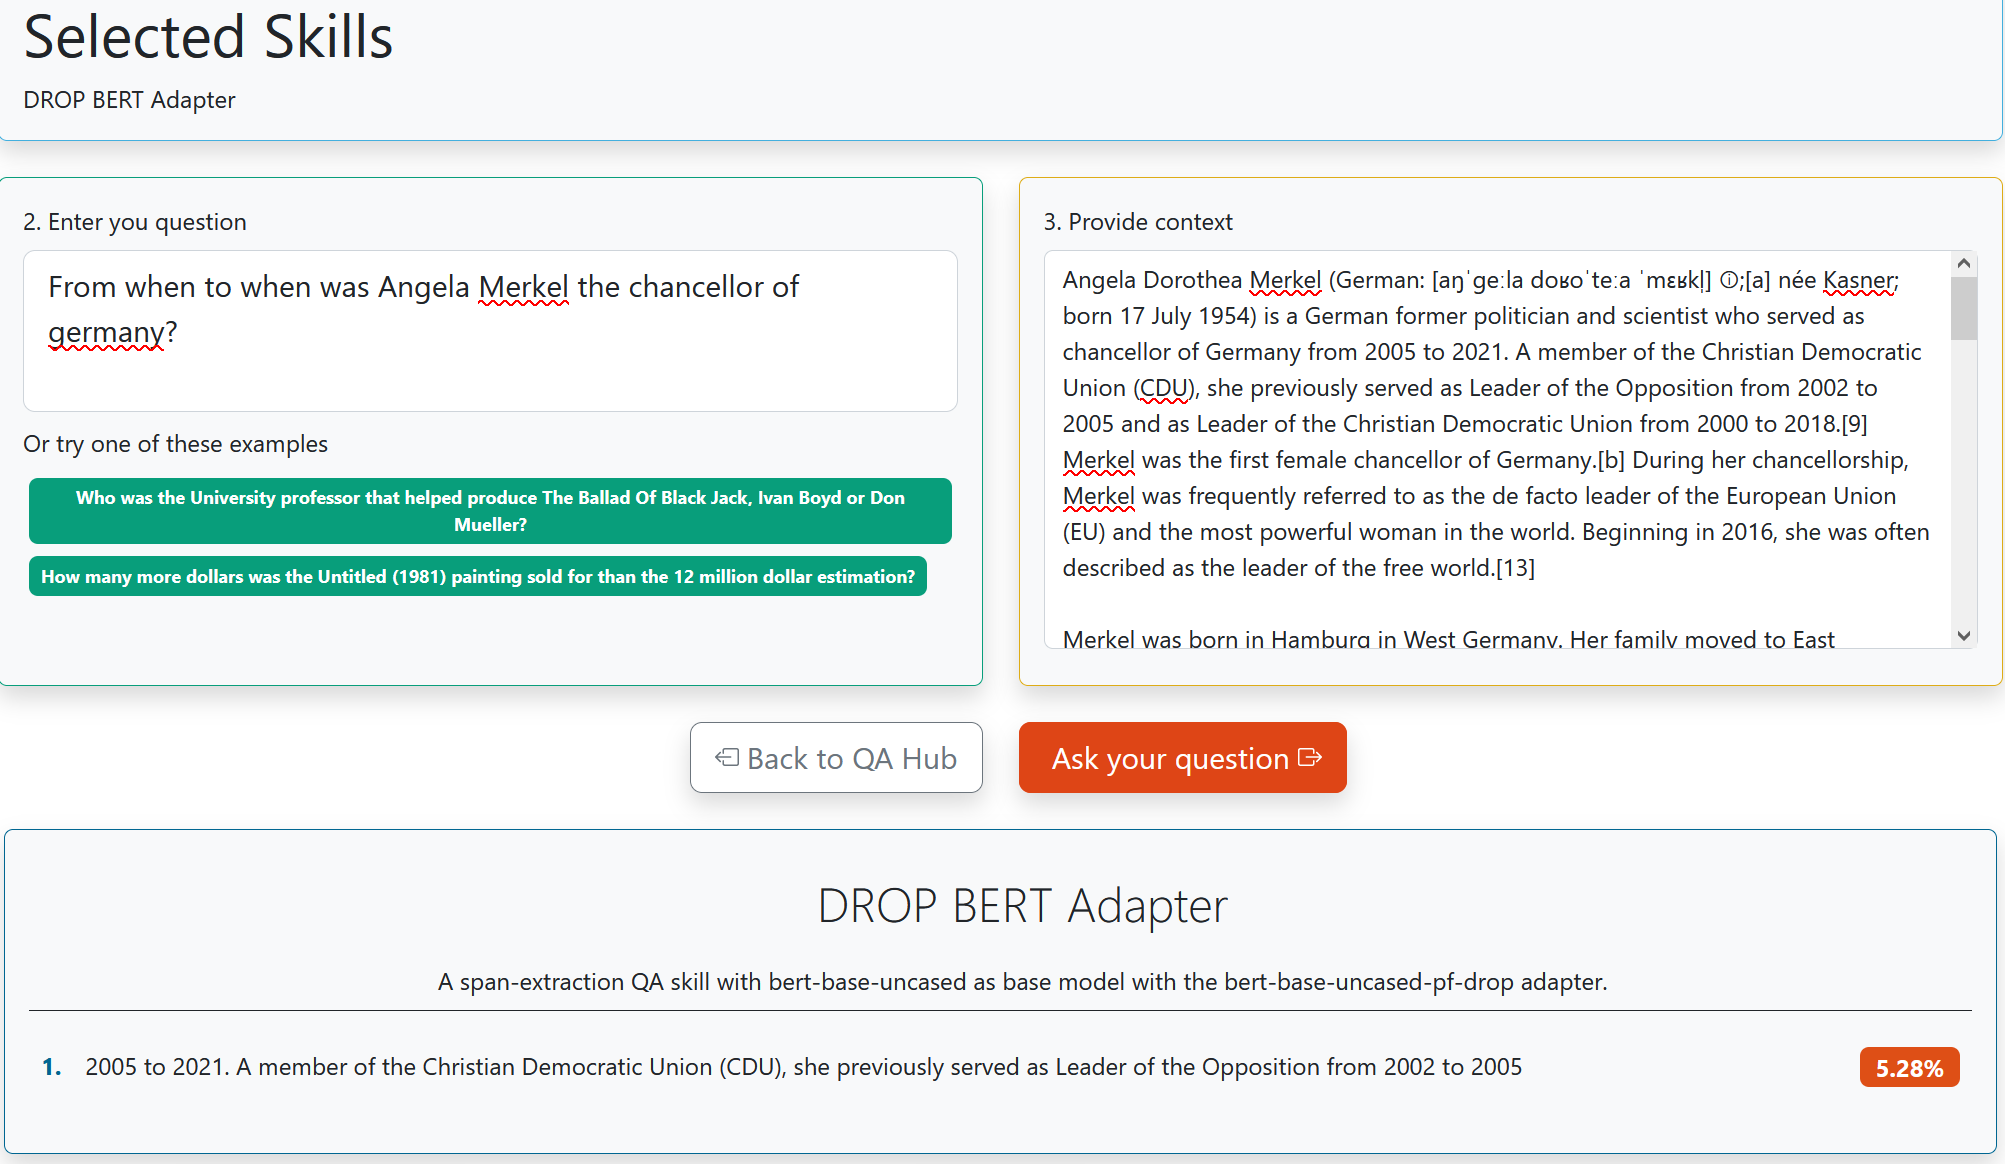

Other models like the xtremedistil model struggle with answering factoid questions correcly while being really good at answering non-factoid questions and even giving all the reasons, non only one of them like f.e. "What was the reason for building the Eiffel tower?" -> centerpiece of the 1889 World's Fair, and to crown the centennial anniversary of the French Revolution

**c) Now we want to formalize the results from above. Explain the concept behind in-domain and out-of-domain data. Analyze your results and categorize the found examples from b) respectively. Which performance would you expect if you run your selected model on a full in-domain and out-of-domain dataset based on the knowledge you gained so far?** **(2p)**

Hint: This concept will be taught in the lecture QA II. It might also help to think about on what dataset the model was trained.

YOUR ANSWER HERE

# Task 3: Explainability - 6 Points

In this task, you will learn about the explainability of transformer-based models. For this purpose, saliency maps are a common method to visualize predictions in Deep Learning inspired by research in computer vision. In the NLP domain,  saliency maps attribute weights to every input token to assess the importance of the model prediction. The UKP-SQuARE platform provides two different family methods: gradient-based and attention-based.
For learning more about it, you can read the following paper: https://aclanthology.org/2022.aacl-demo.4.pdf. or the respective Medium article https://medium.com/@ukp-square/interpreting-saliency-maps-for-question-a-with-ukp-square-a6b2831d8431.
Both are not required to achieve full points on the tasks but help to understand the topics.

Hint: You are highly encouraged to include screenshots to make your results understandable.

**a) Give a short introduction about why explainability is important in Deep Learning research? Because this is an NLP class, provide one example from the domain of NLP.** **(2p)**

Hint: For the example, it's sufficient to think logically, it's not needed to cite papers.

For many tasks in NLP it is important to know the reasons why a certain answer is given and how it came to be. If the model only gives an answer without providing how it got to there, a lot of issues arise. In many cases unexplained answers are simply no enough. In argument mining, giving facts without explenations makes them less believable, unexplained answers are also harder to fact-check, especially if they are more involved than just looking for a date or a translation.
Unexplained answers also pose a problem to reaserachers who want to evaluate their model and make it better. If there is no way of knowing how an answer was found, it is hard to improve upon this answer.


**b) In this subtask we start to analyze the predictions from your selected model with the respective saliency maps. Find at least one method that explains the prediction from your selected model and describe and interpret your results.** **(2p)**

YOUR ANSWER HERE

**c) Explain one method that doesn't explain the prediction from your model and interpret your results. Prove your result with at least one question.** **(2p)**

YOUR ANSWER HERE

# Task 4: Attacking your model - 4 Points

In this task, you will learn about attacking your selected model.
Therefore the UKP-SQuARE interface makes it easy to apply different input modifications to find vulnerabilities in the model. You will explore different attacking methods.
For learning more about the attacking methods, you can read the following paper: https://aclanthology.org/2022.aacl-demo.4.pdf. or the respective Medium article https://medium.com/@ukp-square/interpreting-adversarial-attacks-in-question-answering-with-ukp-square-5f1866ade13c.
Both are not required to achieve full points on the tasks but help to understand the topics.

Hint: You are highly encouraged to include screenshots to make your results understandable.

**a) Identify whether and how your selected model can be fooled/hacked with the Input Reduction method. Interpret your findings in your own words.** **(1p)**

YOUR ANSWER HERE

**b) Identify whether and how your selected model can be fooled/hacked with the Sub-Span method. Interpret your findings in your own words.** **(1p)**

YOUR ANSWER HERE

**c) Identify whether and how your selected model can be fooled/hacked with the Top K method. Interpret your findings in your own words.** **(1p)**

YOUR ANSWER HERE

**d) Explain why it's interesting for you as a researcher to know how your selected model is attackable?** **(1p)**

YOUR ANSWER HERE

**Submission:**

Please upload your submission to Moodle before the next exercise session <font color="red">(Feb 09th, 23:59)</font>!

Submission format: `homework 6.zip`

Your submission should contain your filled out Jupyter notebook (naming schema: `homework 6.ipynb`) and any auxiliar files that are necessary to run your code (e.g., the datasets provided by us).

Each submission must be handed in only once per group.